### Introduction
  
Using the datasets provided by the WPRDC, we narrowed down the factors for the best neighborhood in Pittsburgh to be based on:

* Arrest Rates
* Fire Occurrences
* Overdoses

All three of these metrics are indicative of the safety of the neighborhood, and are thus incredibly important for determining the best neighborhood in Pittsburgh. For each of these metrics, less is considered better. The best neighborhood should have the lowest arrest rates, the least fires, and the lowest number of overdoses. 

**Initial Setup**


In [11]:
import pandas as pd
import geopandas as gpd
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import fpsnippets as fps

HOODS = gp.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")["hood"]
neighborhoods = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
PoliceArrestsData = pd.read_csv('PoliceArrests.csv', sep=",")
fire_accidents_data = pd.read_csv('FireAccidents.csv', sep=",")
od_csv = "https://data.wprdc.org/dataset/allegheny-county-fatal-accidental-overdoses/resource/1c59b26a-1684-4bfb-92f7-205b947530cf/download/1c59b26a-1684-4bfb-92f7-205b947530cf.csv"
od_data = pd.read_csv(od_csv)

### Arrest Rates

Arrest rates in each neighborhood will be used to determine crime rates in that neighborhood. The lower the crime rate, the less violence there is presumed to be within the neighborhood, and the safer the neighborhood is. 

**Counting Arrests** \
Because the dataset included which neighborhood in which each arrest occurred, we were able to easily count the number of arrests that took place in each neighborhood. 

In [25]:
# Datetime Libraries to Filter
PoliceArrestsData['ARRESTTIME'] = pd.to_datetime(PoliceArrestsData['ARRESTTIME'], errors='coerce')

# Group and Display by Neighborhoods
neighborhood_arrests = PoliceArrestsData["INCIDENTNEIGHBORHOOD"].value_counts()
print(neighborhood_arrests.head(10))

INCIDENTNEIGHBORHOOD
Central Business District    4440
South Side Flats             3497
Carrick                      2352
East Allegheny               2217
Homewood South               2090
Homewood North               1969
East Liberty                 1889
Marshall-Shadeland           1516
Bluff                        1502
Mount Washington             1434
Name: count, dtype: int64


**Presenting the Data** \
We then formatted the data so we could make a heat map of how arrests were distributed across Pittsburgh, for easy visualization of the data. 

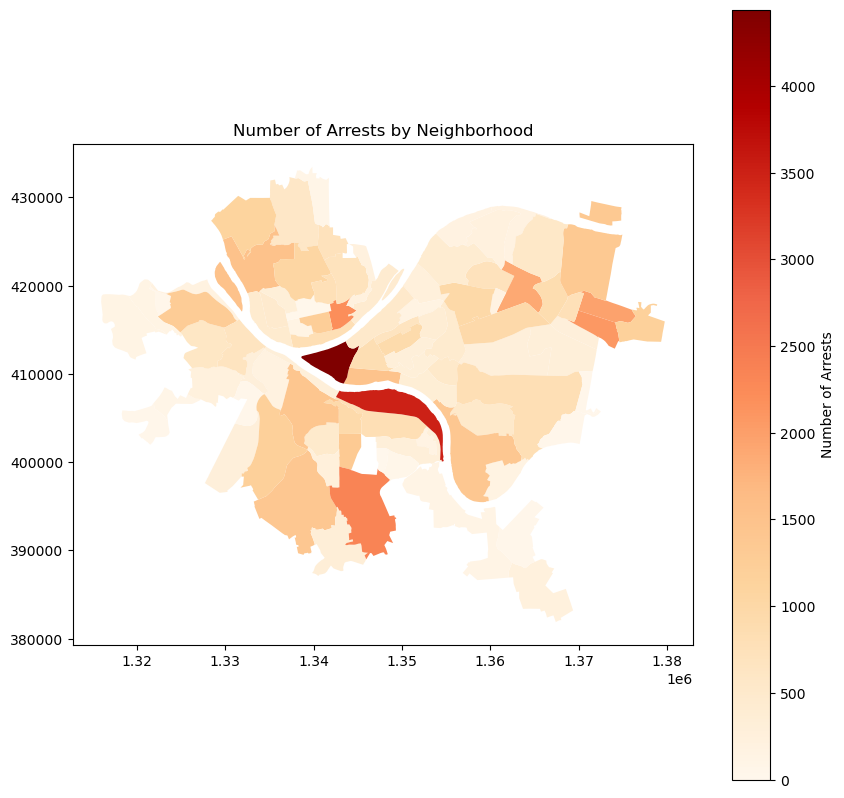

In [34]:
# Convert arrest data into a DataFrame
arrests_df = neighborhood_arrests.reset_index()
arrests_df.columns = ['INCIDENTNEIGHBORHOOD', 'ARREST_COUNT']

# Arrest Data on GeoDataFrame, adjusting missing values
neighborhoods = neighborhoods.merge(arrests_df, left_on='hood', right_on='INCIDENTNEIGHBORHOOD', how='left')
neighborhoods['ARREST_COUNT'] = neighborhoods['ARREST_COUNT'].fillna(0)

# Data Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
neighborhoods.plot(
    column='ARREST_COUNT', cmap='OrRd', legend=True, 
    legend_kwds={'label': "Number of Arrests"}, ax=ax
)
ax.set_title("Number of Arrests by Neighborhood")
plt.show()

**Sorting the Data** \
We then sorted the data in ascending order by the number of arrests that have occurred in each neighborhood. We displayed the neighborhoods with the lowest 10 arrest counts.

In [39]:
least_incidents = arrests_df.sort_values(by='ARREST_COUNT').head(15)  # Sorting in ascending order
least_incidents.head(10)

,INCIDENTNEIGHBORHOOD,ARREST_COUNT
97,Mt. Oliver Neighborhood,2
96,Troy Hill-Herrs Island,6
95,Mt. Oliver Boro,18
94,Central Northside,23
92,Ridgemont,37
93,Regent Square,37
91,New Homestead,39
90,Swisshelm Park,43
89,Chartiers City,46
88,East Carnegie,48


**Plotting the Data** \
We then plotted the data in a bar chart. For readability, and because we were only concerend with the neighborhoods with the lowest number of arrests, we limited the chart to only displaying the lowest 15 neighborhoods in terms of arrest counts.  

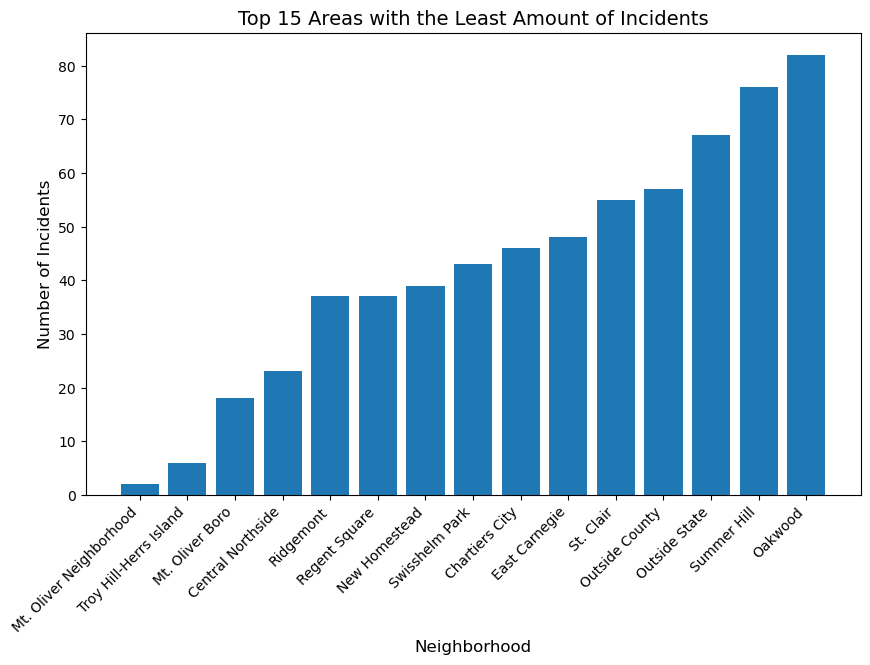

In [41]:
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(least_incidents['INCIDENTNEIGHBORHOOD'], least_incidents['ARREST_COUNT'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Areas with the Least Amount of Incidents", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.show()

**Best Neighborhoods** 

In terms of arrest counts, the best neighborhoods were: 
1. Mt. Oliver
2. Troy Hill-Herrs Island
3. Central Northside
4. Ridgemont
5. Regent Square
6. New Homestead
7. Swisshelm Park
9. Chartiers City

### Fire Occurrences

Fire occurrences will be used to determine the safety of a neighborhood as well. Because fires are dangerous and cause many injuries and deaths each year, we found it vital to include as a metric, especially because our analysis is primarily concerned with the safety of each neighborhood. 

**Counting Fire Occurrences** \
Because the dataset included which neighborhood each fire occurred, we were able to easily count the number of fires that took place in each neighborhood. After doing so, we sorted the data and displayed the neighborhoods with the 10 lowest fire counts. 

In [30]:
# Group and Display by Neighborhoods
neighborhood_fires = fire_accidents_data["neighborhood"].value_counts()

fires_df = neighborhood_fires.reset_index()
fires_df.columns = ['neighborhood', 'FIRE_COUNT']

top_least_areas = fires_df.sort_values(by="FIRE_COUNT", ascending=True).head(15)
top_least_areas.head(10)

,neighborhood,FIRE_COUNT
90,Mount Oliver Borough,6
89,Regent Square,9
88,East Carnegie,11
87,Mt. Oliver,12
86,Ridgemont,12
85,Oakwood,13
84,Arlington Heights,13
83,St. Clair,14
82,Swisshelm Park,17
81,Chartiers City,18


**Plotting the Data** \
We then plotted the data in a bar chart. For readability, and because we were only concerend with the neighborhoods with the lowest number of fires, we limited the chart to only displaying the lowest 15 neighborhoods in terms of fire occurrences.  

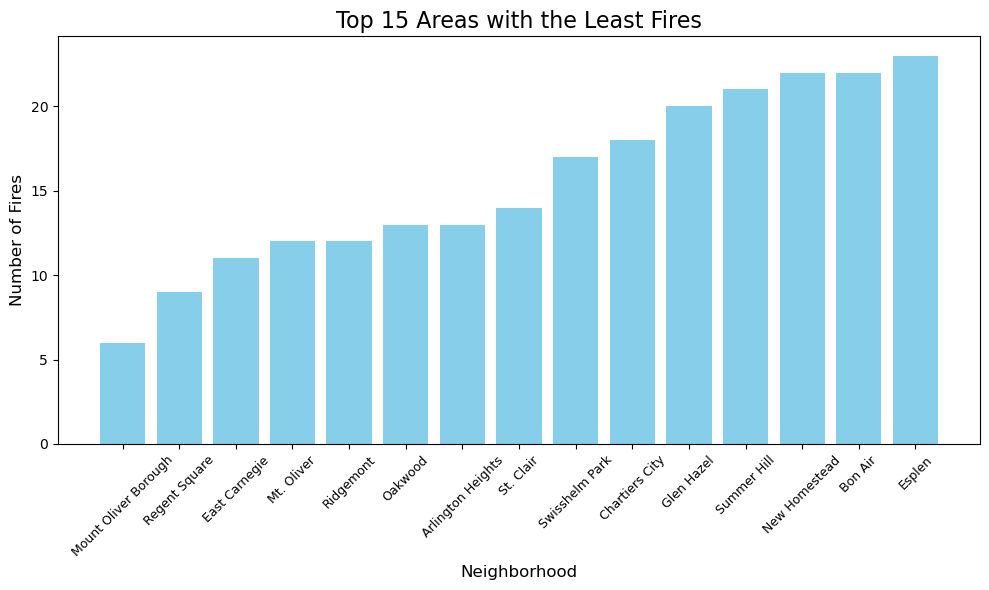

In [23]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_least_areas['neighborhood'], top_least_areas['FIRE_COUNT'], color='skyblue')
plt.title('Top 15 Areas with the Least Fires', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Fires', fontsize=12)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.show()

**Best Neighborhoods** 

In terms of fire occurrences, the best neighborhoods were: 
1. Mount Oliver Borough
2. Regent Square
3. East Carnegie
4. Mt. Oliver
5. Ridgemont
6. Oakwood
7. Arlington Heights
8. St. Clair

### Fatal Overdoses

The number of fatal accidental overdoses within each neighborhood will also be used to determine the safety of the neighborhood. The low the number of overdoses, the less illicit drugs are presumed to be used in the neighborhood, and the safer the neighborhood is. 

**Tallying the Data** \
We started off by tallying the number of overdoses that occurred in each neighborhood. Because the dataset did not include the neighborhood each overdose occured in, we had to determine the neighborhood based on zip code. In cases where the zip code could indicate more than one neighborhood, it was counted towards each neighborhood it could indicate.

In [9]:
od_dict = {}
# zip dict to limit amount of work done
# if the neighborhoods for a zip code have already
# calculated, the work does not need to be done again
zip_dict = {}

# to account for neighborhoods with 0 overdoses
for hood in HOODS: 
    od_dict[hood.title()] = 0

for index, row in od_data.iterrows(): 
    try: 
        zip = int(row["incident_zip"])
    except: 
        # zip is not int - discard
        continue
    try:
        # check for calculation already completed
        hoods = zip_dict[zip]
    except: 
        # neighborhoods indicated by the zip code
        hoods = fps.zip_to_neighborhoods(zip)
        # store calculation for future use
        zip_dict[zip] = hoods
    if hoods != None:
        for hood in hoods: 
            if hood != None: 
                try: 
                    od_dict[hood.title()] += 1
                except: 
                    od_dict[hood.title()] = 1


**Building a DataFrame** \
We used the tallies to create a dataframe. We then sorted the data in ascencding order to find the neighborhoods with the least amounts of overdoses. The lowest 15 are shown below, 12 of which had 0 overdoses. 

In [3]:
od_df = pd.DataFrame([od_dict.keys(), od_dict.values()]).T
od_df.columns= ['Neighborhood', '# Overdoses']

sorted_ods = od_df.sort_values(by='# Overdoses', ascending=True)
sorted_ods.head(15)

,Neighborhood,# Overdoses
45,Allegheny Center,0
50,Chartiers City,0
57,West End,0
58,Esplen,0
31,Bon Air,0
28,East Carnegie,0
25,Hays,0
64,Ridgemont,0
23,Fairywood,0
18,Arlington Heights,0


**Visulaizing the Data** \
To get a better idea of the spread of the data, we plotted a bar chart. Because the chart was hard to read and we only care about the lowest neighborhoods, we created an additional chart depicting only the lowest 25 neighborhoods in terms of overdoses. 

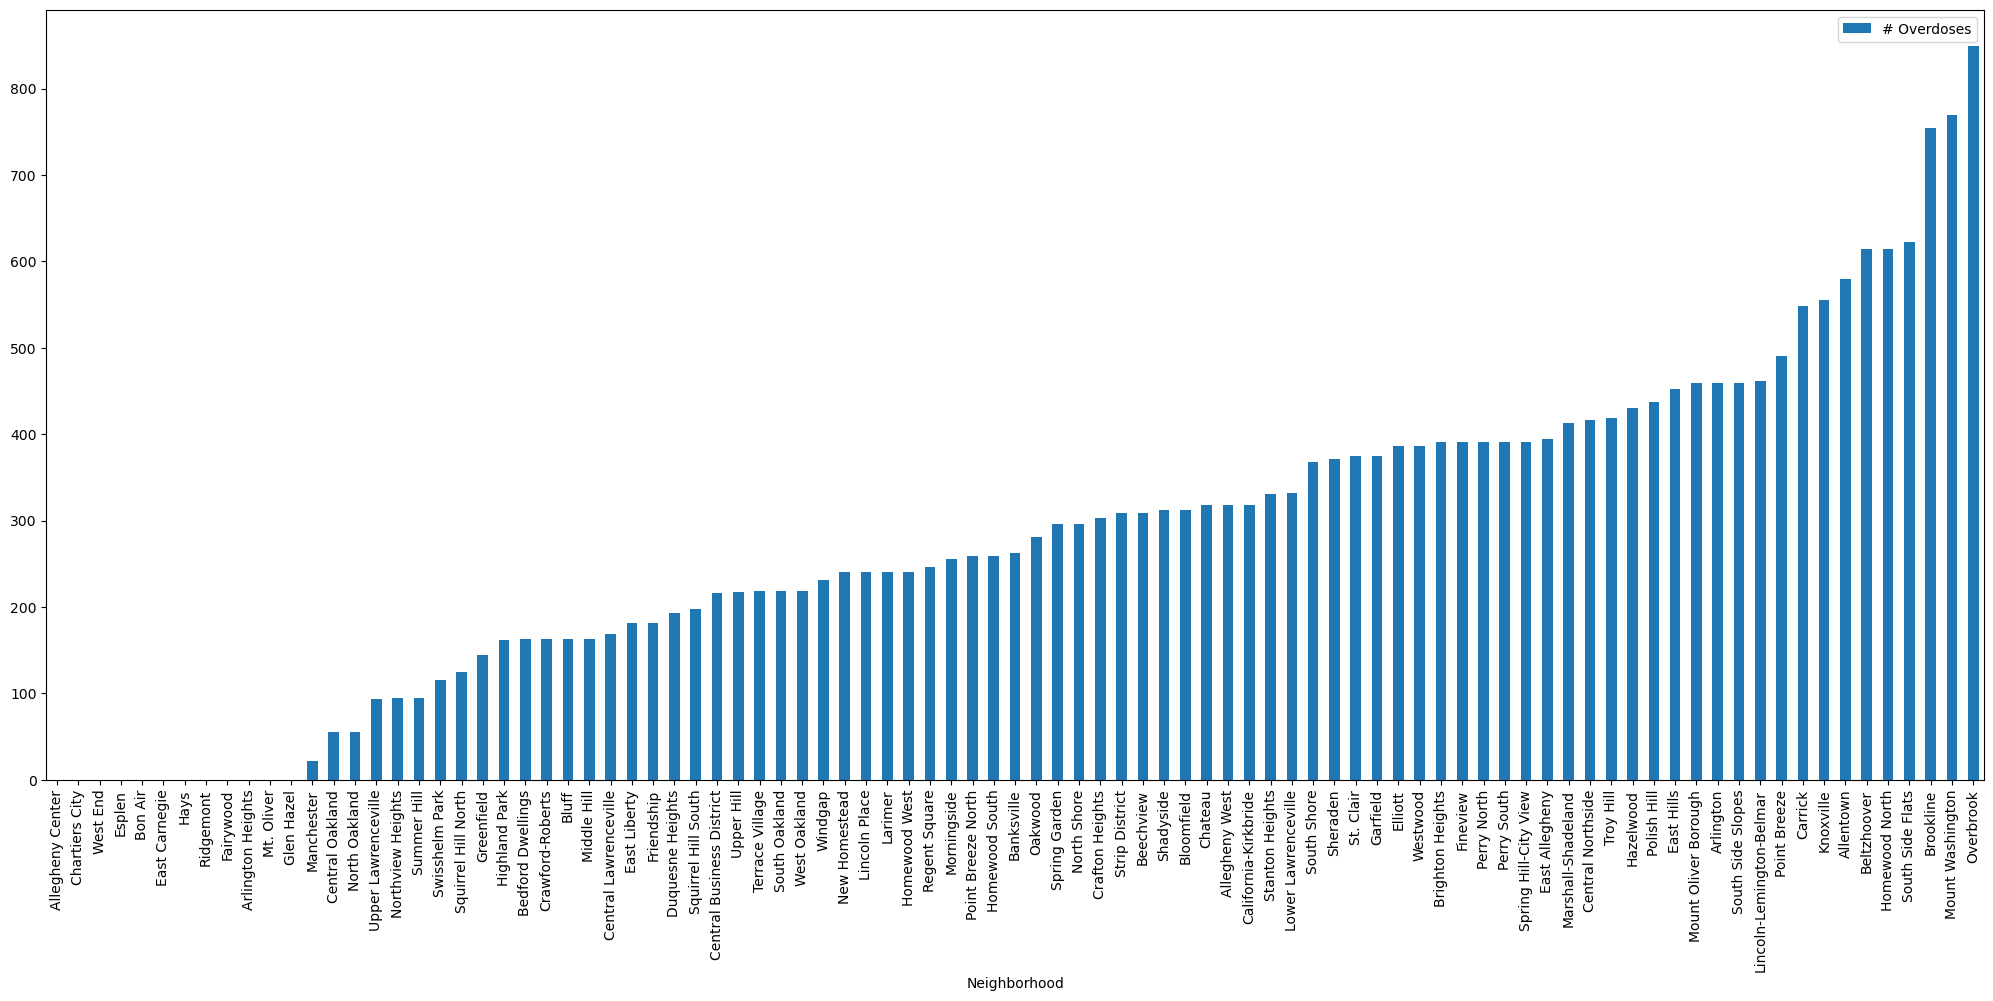

In [5]:
sorted_ods.plot.bar(x="Neighborhood",y="# Overdoses",width = .5, figsize=(25,10))
plt.show()

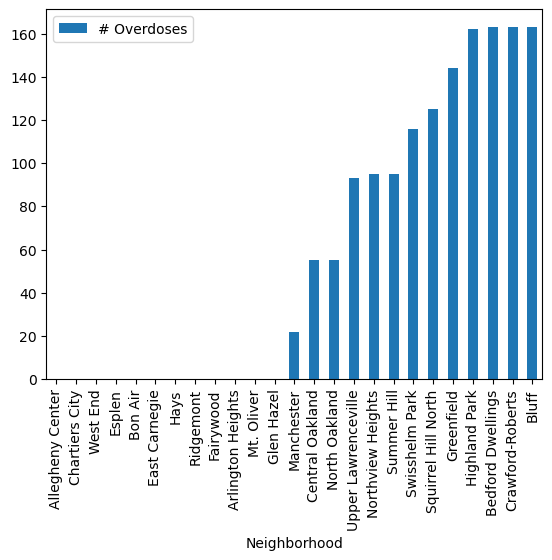

In [6]:
lowest_ods = sorted_ods[:25]
lowest_ods.plot.bar(x="Neighborhood",y="# Overdoses")
plt.show()

**Best Neighborhoods**

In terms of fatal overdoses, the best neighborhoods were: 
* Allegheny Center
* Arlington Heights
* Bon Air
* Chartiers City
* East Carnegie
* Esplen
* Fairywood
* Glen Hazel
* Hays
* Mt. Oliver
* Ridgemont
* West End

Because there were a number of neighborhoods that had zero overdoses, we ended up with a whopping 12 top neighborhoods in terms of overdoses that have occurred. These 12 neighborhoods score the highest in safety in terms of fatal overdoses. We originally planned to take into account population size, as many of these top neighborhoods have relatively small populations. However, because there are 12 neighborhoods with 0 overdoses, we found it unnecessary to do so, as scaling by population would not change the top neighborhoods. 

### Conclusion

We determined the overall best neighborhood in Pittsburgh to be Mt. Oliver. Mt. Oliver ranked highly in all the metrics we chose, overall winning the title of the best neighborhood in the city. Coming in a close second was Ridgemont, which ranked 4th in arrest counts and 5th in fire occurences. Both Mt. Oliver and Ridgemont had 0 fatal accidental overdoses. These neighborhoods, because of how high they scored in each category, were determined to be the safest neighborhoods in Pittsburgh. If you move to on

#### Individual Conclusions 

**Emily** \
I was not surprised that the top neighborhoods were the ones with lower populations. I was more surprised by outcomes within the individual datasets, like how many neighborhoods had 0 overdoses, and how high arrest and fire numbers were in some neighborhoods. 